[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
U1
[[ 0.00000000e+00  1.12535175e-07  1.23409804e-04  1.83156389e-02
   3.67879441e-01  1.00000000e+00  3.67879441e-01  1.83156389e-02
   1.23409804e-04  1.12535175e-07]
 [ 3.14171308e-06  5.06462340e-05  1.47491711e-03  3.47930687e-02
   3.78706481e-01  9.05957052e-01  2.89778042e-01  1.42993710e-03
  -2.42481401e-04  2.13174518e-05]
 [ 6.29163848e-05  3.73236896e-04  4.07522355e-03  5.16176677e-02
   3.86507871e-01  8.20800046e-01  2.25347046e-01 -9.17985571e-03
   5.69497664e-04  1.75437065e-04]
 [ 3.05576359e-04  1.24320505e-03  8.12445034e-03  6.85844460e-02
   3.90978886e-01  7.42601551e-01  1.72161092e-01 -1.47323793e-02
   2.39292698e-03  5.44134857e-04]
 [ 8.35506598e-04  2.78559818e-03  1.34789815e-02  8.51892776e-02
   3.92088883e-01  6.70517396e-01  1.28409638e-01 -1.64619708e-02
   4.87520460e-03  1.09234805e-03]
 [ 1.69679944e-03  4.99448390e-03  1.98664200e-02  1.00980216e-01
   3.90008444e-01  6.04042552e-01  9.2666037

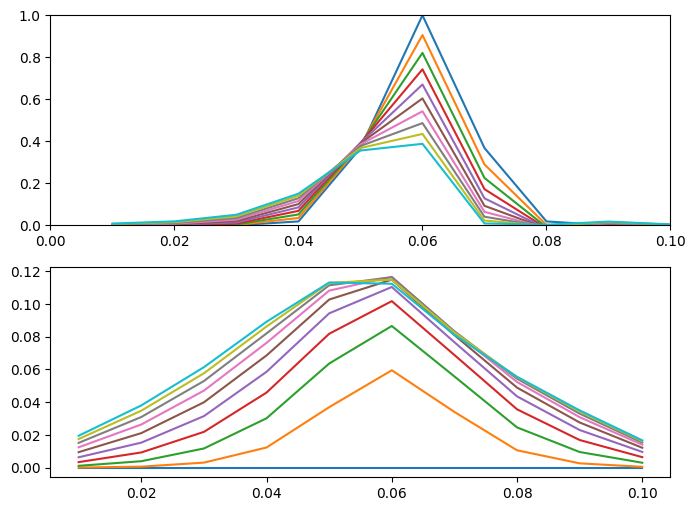

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametros
n = 20
L = 1
m = 10
h = 0.1
k = 10
a = 5
b = 100
c = 210

def system(variables, t):

    # Reshape the variables array to match the desired structure
    u = variables.reshape(n)

    # Define the matrix A
    #Matriz auxiliar 1
    A = np.zeros((n, n))

#Matriz auxiliar 1
    A=np.zeros((n,n))
    for i in range(n):
      if i == 0:
        A[i, i]     = -k
        A[i, i+1]   =  a
        A[i, i+m]   =  k
      elif i == m-1:
        A[i, i-1]   = -a
        A[i, i]     = -k
        A[i, i+m]   =  k
      elif i>0 and i<m-1:
        A[i, i-1]   = -a
        A[i, i]     = -k
        A[i, i+1]   =  a
        A[i, i+m]   =  k
      elif i == m:
        A[i, 0]     =  k
        A[i,i-1]    =  b
        A[i, i]     = -c
        A[i, i+1]   =  b
      elif i == n-1:
        A[i, i-1]   =  b
        A[i, i]     = -c
        A[i, m-1]     =  k
      elif i>m and i<n-1:
        A[i, i-1]   =  b
        A[i, i]     = -c
        A[i, i+1]   =  b
        A[i, i-m]   =  k



    # Calculate the derivatives
    dU = np.dot(A, u) #Reshape 'u' to a column vector for matrix multiplication



    # Return the derivatives as a 1-dimensional array
    return dU.flatten()

# Valores iniciales
x0 = np.zeros(m)
for i in range(1,10):  # Changed range to 0-3 for indexing from 0
    x0[i] = np.exp(-100 * (i * h - 0.5)**2)  # Use i*h for x values
y0 = np.zeros(10)  # Initialize y0 as an array of zeros
initial_conditions = np.concatenate([x0, y0])  # Concatenate x0 and y0
#print('Condiciones iniciales')
#print(initial_conditions)
# Intervalo de tiempo
t = np.linspace(0.01, 0.1, 10)
print(t)
# Resolver el sistema de ecuaciones
solution = odeint(system, initial_conditions, t)

# Extract solutions for x and y (assuming they are the first 4 and last 4 elements)
u1 = solution[: , :10]
u2 = solution[: , 10:]
print("U1")
print(u1)
#print("U2")
#print(u2)
#print(y[:,0])
# Graficar las soluciones
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
##############Graficas para U1######################
for i in range(10):
  axs[0].plot(t, u1[i,:], label='x1(t)')
axs[0].set_xlim(0, 0.1)
axs[0].set_ylim(0, 1)
###############Graficas para U2#####################
for i in range(10):
  axs[1].plot(t, u2[i,:], label='y1(t)')
#axs[1].plot(t, u2[0,:], label='y1(t)')

#plt.plot(t, u1[0,:], label='x1(t)')  # Example: Plotting the first x variable
#plt.plot(t, u2[0,:], label='y1(t)')  # Example: Plotting the first